### Task : Classification (Stochastic Gradient Descent Classifier -> Multiclass)

#### Input Features (Predictor Variables) : Pixel Values (28 x 28)

#### Output (Response Variable(s)) : Digit (0 - 9)


### Importing the necessary modules


In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, preprocessing, metrics, datasets, base
from joblib import dump, load

### Collecting, Analyzing and Visualizing the data


In [16]:
data = datasets.fetch_openml('mnist_784')

In [21]:
df = data.data
df['label'] = data.target
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 786 entries, pixel1 to label
dtypes: category(2), float64(784)
memory usage: 418.8 MB


In [23]:
df['label'].value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: label, dtype: int64

In [5]:
X = df.drop('label', axis = 1).values
y = df['label'].values

1


<Figure size 432x288 with 0 Axes>

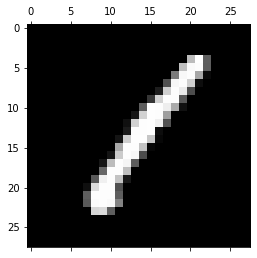

0


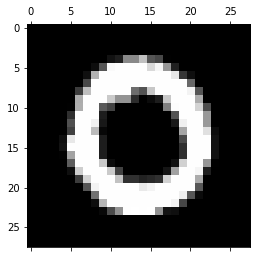

4


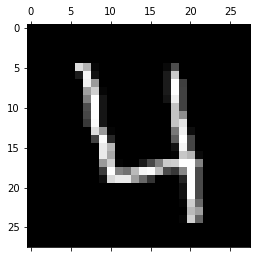

7


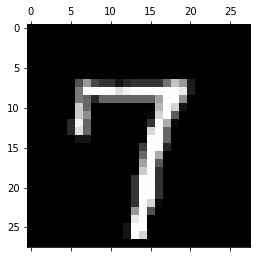

3


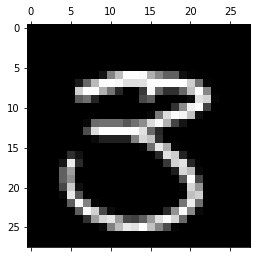

5


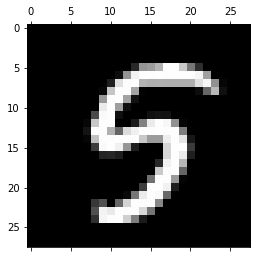

8


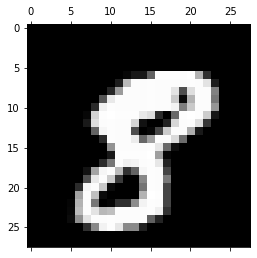

9


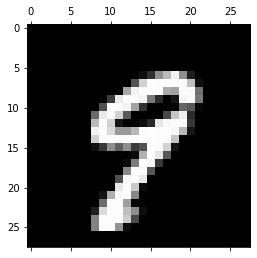

2


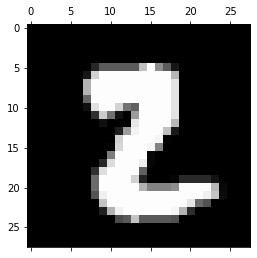

6


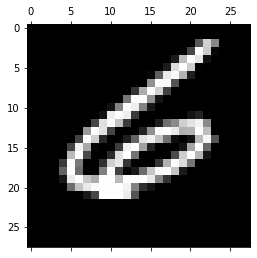

In [6]:
visited = []

plt.gray()
for i in range(22):
    if y[i] not in visited:
        img = X[i].reshape(28, 28)
        visited.append(y[i])
        print(y[i])
        plt.matshow(img)
        plt.show()

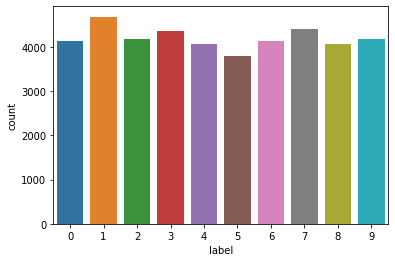

In [7]:
sns.countplot(x = 'label', data = df)
plt.show()

### Preparing the data


In [8]:
# Stratified Splitting

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 3)

for train_index, test_index in strat_split.split(df, df[['label']]):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

In [9]:
print(train_set.shape, test_set.shape)

(33600, 785) (8400, 785)


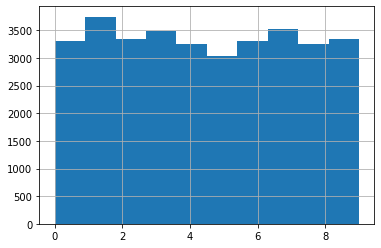

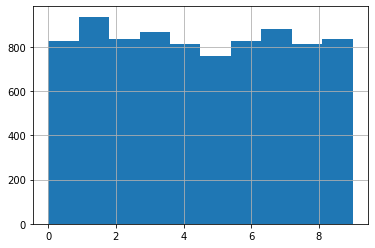

In [10]:
# Checking whether the samples are uniformely distributed

train_set['label'].hist()
plt.show()

test_set['label'].hist()
plt.show()

In [11]:
X_train = train_set.drop('label', axis = 1).values
X_test = test_set.drop('label', axis = 1).values
y_train = train_set['label'].values
y_test = test_set['label'].values

### Training the model and Evaluating it's performance


In [12]:
# Training the Classifier

clf = linear_model.SGDClassifier()

clf.fit(X_train, y_train)

SGDClassifier()

In [13]:
y_train_pred = clf.predict(X_train)

train_acc = np.sum(y_train == y_train_pred) / len(y_train)

print("Training Accuracy :", train_acc)

Training Accuracy : 0.8824404761904762


In [ ]:
# Confusion Matrix (Train Set)

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

plt.figure(figsize = (20, 10))
sns.heatmap(conf_matrix, annot = True)
plt.show()

In [ ]:
# Classification Metrics

precision = metrics.precision_score(y_train, y_train_pred, average = 'weighted')
recall = metrics.recall_score(y_train, y_train_pred, average = 'weighted')
f1_score = metrics.f1_score(y_train, y_train_pred, average = 'weighted')

print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1_score)

In [ ]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)

print(clf_report)

### Validating the model


In [14]:
y_test_pred = clf.predict(X_test)

test_acc = np.sum(y_test == y_test_pred) / len(y_test)

print("Testing Accuracy :", test_acc)

Testing Accuracy : 0.8560714285714286


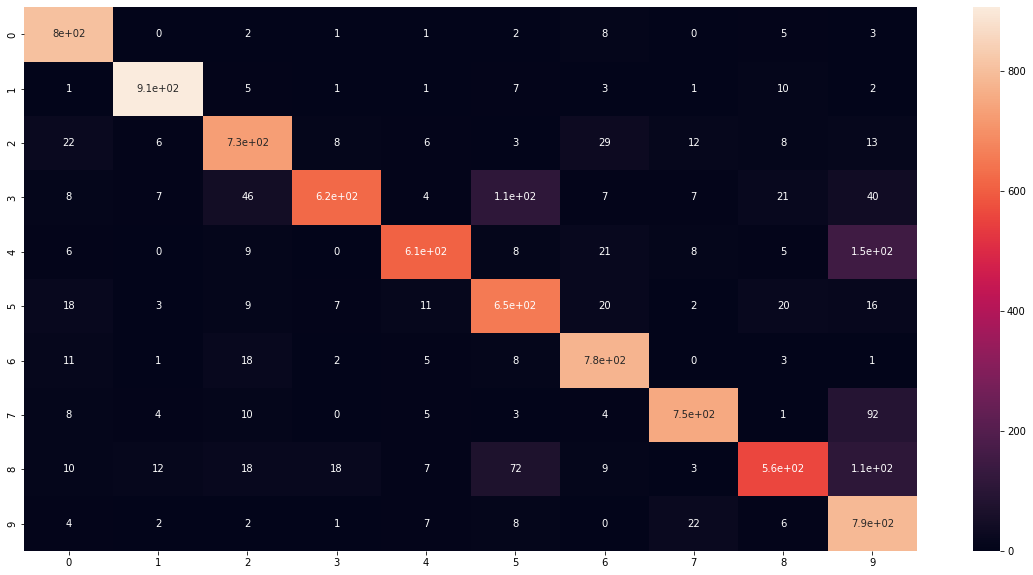

In [15]:
# Confusion Matrix (Test Set)

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

plt.figure(figsize = (20, 10))
sns.heatmap(conf_matrix, annot = True)
plt.show()

In [16]:
# Classification Metrics

precision = metrics.precision_score(y_test, y_test_pred, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred, average = 'weighted')
f1_score = metrics.f1_score(y_test, y_test_pred, average = 'weighted')

print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1_score)

Precision : 0.8708298718976638
Recall : 0.8560714285714286
F1 Score : 0.856295791182036


In [17]:
# Classification Report

clf_report = metrics.classification_report(y_test, y_test_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       827
           1       0.96      0.97      0.96       937
           2       0.86      0.87      0.87       835
           3       0.94      0.71      0.81       870
           4       0.93      0.74      0.83       814
           5       0.75      0.86      0.80       759
           6       0.89      0.94      0.91       827
           7       0.93      0.86      0.89       880
           8       0.88      0.68      0.77       813
           9       0.65      0.94      0.77       838

    accuracy                           0.86      8400
   macro avg       0.87      0.85      0.85      8400
weighted avg       0.87      0.86      0.86      8400



#### Cross Validation


In [18]:
kf = model_selection.StratifiedKFold(n_splits = 3)

scores = []

for train_index, test_index in kf.split(X, y):
    X_train_folds = X[train_index]
    X_test_folds = X[test_index]
    y_train_folds = y[train_index]
    y_test_folds = y[test_index]
    
    m = base.clone(clf)
    m.fit(X_train_folds, y_train_folds)
    scores.append(m.score(X_test_folds, y_test_folds))

In [19]:
print("Cross Validation Scores :", scores)
print("Average Cross Validation Score :", np.sum(scores) / len(scores))

Cross Validation Scores : [0.8532857142857143, 0.8746428571428572, 0.8816428571428572]
Average Cross Validation Score : 0.869857142857143


### Saving the model into memory


In [ ]:
dump(clf, "digits_clf")